In [5]:
import pandas as pd
import numpy as np
import data_loader as dl 
import matplotlib
import seaborn

In [6]:
allScanNums = {}

In [7]:
#getting rid of duplicates and decoys, but not pvals cutoffs
def filter_data(df, msfragger=False, prob_column='probability'):
    #drop decoy
    df = df[df["decoy"]==False]
    #sort by qvalue
    df = df.sort_values(prob_column)
    #drop duplicate scans
    df = df.drop_duplicates(subset=["scan"], keep="first") #keep highest coring
    return df


In [8]:
#pulling only scan numbers out
def newScanNum(row):
    return(int(row[35:40]))
    

In [9]:
meta = dl.clean_metamorph("2ng")
meta_data = filter_data(meta)

meta_data

,decoy,scan,peptide,probability
0,False,38422,AEGSDVANAVLDGADCIMLSGETAK,0.000000
1376,False,38502,VTIAQGGVLPNIQAVLLPK,0.000000
1374,False,21218,KPTDGASSSNCVTDISHLVR,0.000000
5873,False,32203,LVSSPCCIVTSTYGWTANMER,0.000000
5876,False,15587,NM+15.995M+15.995AACDPR,0.000000
...,...,...,...,...
24633,False,24798,RGNLLGGWK,0.329995
24930,False,21601,FDDSGSWRGR,0.330270
22435,False,21363,IASAPGSKMSQSGSPISAFSLRDIQVR,0.330607
22012,False,38336,KKPGSLFAALM+15.995ATATSSLR,0.330671


In [6]:
msgf = dl.clean_msgfplus("2ng")
msgfplus_data = filter_data(msgf)
msgfplus_data

,decoy,scan,peptide,probability
0,False,19653,NMGGPYGGGNYGPGGSGGSGGYGGR,0.000000
6422,False,30100,EAAWAISNLTISGR,0.000000
6423,False,28960,EEAWVIGSVVAR,0.000000
6424,False,24500,DYLLCDYNR,0.000000
6425,False,14802,EGETVEPYK,0.000000
...,...,...,...,...
35768,False,7720,DCDTESM+15.995AESN,0.484208
35770,False,35523,SSQDGSGD,0.484230
35785,False,42894,GDDGSPGR,0.484318
35787,False,27459,SGSGSEED,0.484470


In [7]:
msf = dl.clean_msfragger("2ng")
msf['scan'] = msf['scan'].apply(newScanNum) 
msfrag_data = filter_data(msf)
msfrag_data

,decoy,scan,peptide,probability
843,False,13697,n[43]MPAVLGFEGSANK,0.0511
7253,False,25351,ADLINNLGTIAK,0.0514
9962,False,29739,NSLESYAFNMK,0.0515
5791,False,23035,NGSEADIDEGLYSR,0.0527
4210,False,20448,YNGVFQECCQAEDK,0.0530
...,...,...,...,...
6754,False,24567,DIISDTSGDFR,1.0000
6755,False,24568,GPVEGYEENEEFLR,1.0000
6756,False,24569,LVLLGESAVGK,1.0000
6750,False,24561,THSDQFLVAFK,1.0000


In [8]:
mq = dl.clean_maxquant("2ng")
maxq_data = filter_data(mq)
maxq_data

/Users/daishavanderwatt/Payne_Lab/SingleCellBenchMark/data_loader.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp_peptide'] = df.apply(lambda row: format_oxidation(row, "Modified sequence", "(Oxidation (M))"), axis=1)
/Users/daishavanderwatt/Payne_Lab/SingleCellBenchMark/data_loader.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["temp_peptide"] = df["temp_peptide"].str[1:-1]
/Users/daishavanderwatt/Payne_Lab/SingleCellBenchMark/data_loader.py:169: SettingWithCopyWarning: 
A value is

,decoy,scan,peptide,probability
33067,False,18289,PGNQNTQVTEAWNK,1.771913e-113
53134,False,40678,EILFSVDSSINQSIGGVILFHETLYQK,2.478126e-82
31499,False,16565,TNQELQEINR,4.134555e-76
37796,False,23490,VDATEESDLAQQYGVR,9.773177e-67
35548,False,21018,INEELESQYQQSMDSK,1.043751e-66
...,...,...,...,...
59377,False,49302,,NaN
59379,False,49304,,NaN
59384,False,49331,,NaN
59386,False,49335,,NaN


In [9]:
#datalist = dictionary part changing, word = which part getting change, 
#dataSet = which data set is getting added
def add(dataList, word, dataSet):
    temp_list = dataList[word]
    temp_list.append(dataSet)
    dataList[word] = temp_list

In [10]:
def scan_data(dataSet, dataNames, otherDatas): 
    data_Dict = {}
    for index in dataSet.index: 
        matches = {'same': [], 'different': [], 'missing':[]} 
        scan_num = dataSet.scan[index] 
        pep = dataSet.peptide[index]
        allScanNums[scan_num] = False
        
        for index in range(3):
            file = otherDatas[index]
            name = dataNames[index]
            temp = file[file.scan == scan_num]

            #check that df isn't empty
            if temp.empty == False: 
                if temp.iloc[0,2] == pep: #check if peps match
                    #print("found scan num: " + str(temp.iloc[0,0]))
                    add(matches, 'same', name)

                else:
                    #print("diff: ")
                    #print("fnd pep: " + temp.iloc[0,1])
                    add(matches, 'different', name)

            #when the scan number is empty
            else:
                add(matches, 'missing', name)
                #print(name + ' was empty')    
        data_Dict[scan_num] = matches
    return data_Dict

In [11]:
Meta_dict = scan_data(meta_data, ['MaxQuant', 'MsgfPlus', 'Msfragger'], [maxq_data, msgfplus_data, msfrag_data])
print(len(Meta_dict))

16306


In [12]:
Msfrag_dict = scan_data(msfrag_data, ['MaxQuant', 'MsgfPlus', 'MetaMorpheus'], [maxq_data, msgfplus_data, meta_data])
print(len(Msfrag_dict))
Msfrag_dict

13487


{13697: {'same': [],
  'different': ['MaxQuant', 'MetaMorpheus'],
  'missing': ['MsgfPlus']},
 25351: {'same': ['MsgfPlus', 'MetaMorpheus'],
  'different': ['MaxQuant'],
  'missing': []},
 29739: {'same': ['MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': ['MaxQuant']},
 23035: {'same': ['MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': ['MaxQuant']},
 20448: {'same': [],
  'different': ['MsgfPlus'],
  'missing': ['MaxQuant', 'MetaMorpheus']},
 35096: {'same': ['MsgfPlus'],
  'different': [],
  'missing': ['MaxQuant', 'MetaMorpheus']},
 30651: {'same': ['MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': ['MaxQuant']},
 17215: {'same': ['MetaMorpheus'],
  'different': ['MaxQuant'],
  'missing': ['MsgfPlus']},
 26540: {'same': ['MsgfPlus', 'MetaMorpheus'],
  'different': [],
  'missing': ['MaxQuant']},
 23783: {'same': [],
  'different': ['MaxQuant', 'MsgfPlus', 'MetaMorpheus'],
  'missing': []},
 38029: {'same': ['MsgfPlus'],
  'different': ['MaxQuant'],


In [13]:
MsgfPlus_dict = scan_data(msgfplus_data, ['MaxQuant', 'Msfragger', 'MetaMorpheus'], [maxq_data,  msfrag_data, meta_data])
print(len(MsgfPlus_dict))

23665


In [14]:
MaxQ_dict = scan_data(maxq_data, ['MetaMorpheus', 'MsgfPlus', 'Msfragger'], [meta_data, msgfplus_data, msfrag_data])
print(len(MaxQ_dict))

31604


In [15]:
def checkAll(num):
    if num in Meta_dict: 
        if len(Meta_dict[num]['same']) == 3:
            return True

In [16]:
def check_in_Meta(num, similar1, similar2, diff):
    if num in Meta_dict:
        if similar1 in Meta_dict[num]['same'] and similar2 in Meta_dict[num]['same'] and diff in Meta_dict[num]['different']:
             return True

In [17]:
def check_in_Msgf(num, similar1, similar2, diff):
    if num in MsgfPlus_dict:
        if similar1 in MsgfPlus_dict[num]['same'] and similar2 in MsgfPlus_dict[num]['same'] and diff in MsgfPlus_dict[num]['different']:
             return True

In [18]:
def check_in_Msf(num, similar1, similar2, diff):
    if num in Msfrag_dict:
        if similar1 in Msfrag_dict[num]['same'] and similar2 in Msfrag_dict[num]['same'] and diff in Msfrag_dict[num]['different']:
             return True

In [19]:
#Checking how many match on scan number for all, 
#but have one that the peptide is different
allSame = []
noMSG = []
noMsF = []
noMM = []
noMQ = []

for num in allScanNums:
    if checkAll(num) == True:
        allSame.append(num)
    elif check_in_Meta(num, 'Msfragger', 'MaxQuant', 'MsgfPlus') == True:
        noMSG.append(num)
    elif check_in_Meta(num,'Msfragger', 'MsgfPlus', 'MaxQuant') == True:
        noMQ.append(num)
    elif check_in_Meta(num,'MaxQuant', 'MsgfPlus', 'Msfragger') == True:
        noMsF.append(num)
    elif check_in_Msgf(num, 'Msfragger', 'MaxQuant', 'MetaMorpheus') == True:
        noMM.append(num)
        
print('allSame: ' + str(len(allSame)))
print('noMSG: ' + str(len(noMSG)))
print('noMsF: ' + str(len(noMsF)))
print('noMM: ' + str(len(noMM)))
print('noMQ: ' + str(len(noMQ))) 

allSame: 10389
noMSG: 164
noMsF: 33
noMM: 799
noMQ: 546


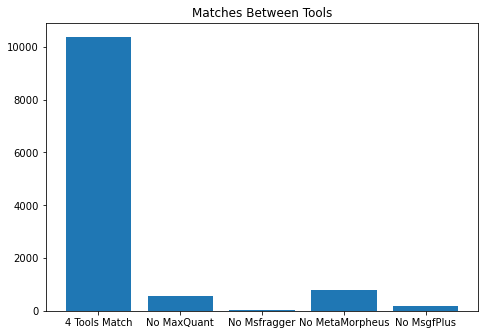

In [20]:
#with scan number and peptide matching
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tools = ['4 Tools Match','No MaxQuant', 'No Msfragger', 'No MetaMorpheus', 'No MsgfPlus']
ranges = [len(allSame), len(noMQ), len(noMsF), len(noMM), len(noMSG)]
ax.bar(tools, ranges)
plt.title("Matches Between Tools")
plt.show()

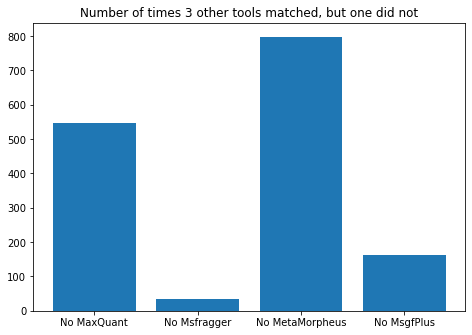

In [21]:
#with scan number and peptide matching
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tools = ['No MaxQuant', 'No Msfragger', 'No MetaMorpheus', 'No MsgfPlus']
ranges = [len(noMQ), len(noMsF), len(noMM), len(noMSG)]
ax.bar(tools, ranges)
plt.title("Number of times 3 other tools matched, but one did not")
plt.show()

In [44]:
#For tools where one tool found a diff peptide than the other three,
#Getting their pval
def find_pvals(list_without, dataSet, name, finalDF):
    for num in list_without:
        tempFrame = dataSet[dataSet.scan == num]
        tempFrame['dataset'] = name
        if tempFrame.empty != True:
            peptide = tempFrame.iloc[0,3]
            tempFrame.iloc[0,3] = peptide
            finalDF = pd.concat([tempFrame, finalDF], ignore_index = True)
    return finalDF

In [45]:
#For tools where one tool found a diff peptide than the other three,
#Getting their pval
def find_pvals_msf(list_without, dataSet, name, finalDF):
    for num in list_without:
        tempFrame = dataSet[dataSet.scan == num]
        tempFrame['dataset'] = name
        if tempFrame.empty != True:
            peptide = tempFrame.iloc[0,3]
            peptide = 1 - peptide
            tempFrame.iloc[0,3] = peptide
            finalDF = pd.concat([tempFrame, finalDF], ignore_index = True)
    return finalDF

In [46]:
Pval_df = pd.DataFrame()

Pval_df = find_pvals_msf(noMsF, msf, 'msf', Pval_df)
print(len(Pval_df))

Pval_df = find_pvals(noMSG, msgf, 'msgf', Pval_df)
print(len(Pval_df))

Pval_df = find_pvals(noMQ, mq, 'mq', Pval_df)
print(len(Pval_df))

Pval_df = find_pvals(noMM, mq, 'meta', Pval_df)
print(len(Pval_df))

#cutting any pvals greater than 1, don't care about those
Pval_df = Pval_df[Pval_df.probability <= 1]
print(len(Pval_df))

<ipython-input-45-9b36609c364b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempFrame['dataset'] = name
/Users/daishavanderwatt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


33
233
779
1578
1290


In [47]:
Pval_df

,decoy,scan,peptide,probability,dataset
0,False,29170,LLLEEIYR,0.079845,meta
1,False,16154,GPSYGLSR,0.139609,meta
2,False,15696,ETAENYLGHTAK,0.011919,meta
3,False,12026,LQSEPESIRK,0.074626,meta
4,False,12689,DYSDHPSGGSYR,0.033700,meta
...,...,...,...,...,...
1573,False,17936,AEELGQELK,0.044100,msf
1574,False,29499,n[43]SIFTPTNQIR,0.001300,msf
1575,False,22438,QVPVDVVEMK,0.000000,msf
1576,False,16103,AAALEAM+15.995K,0.212900,msf


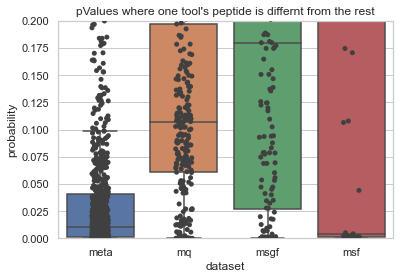

In [48]:
# For matching scans and peptides
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.boxplot(x="dataset", y="probability", data=Pval_df, showfliers = False)
ax = sns.stripplot(x="dataset", y="probability", data=Pval_df, color=".25")
plt.ylim(0,0.2)
plt.title("pValues where one tool's peptide is differnt from the rest")
plt.show()

In [27]:
Matched_ScanAndPep = pd.DataFrame(columns = ['scan', 'meta_peptide', 'msf_peptide', 'msgf_peptide', 
                                          'mq_peptide', 'meta_pval', 'msf_pval', 
                                          'msgf_pval', 'mq_pval'])


In [28]:
Matched_ScanAndPep = pd.DataFrame()
for num in allSame:
    meta_values = meta[meta.scan == num]
    meta_pval = meta_values.iloc[0,3]
    meta_pep = meta_values.iloc[0,2]
    
    msf_values = msf[msf.scan == num]
    msf_pval = msf_values.iloc[0,3]
    msf_pep = msf_values.iloc[0,2]
    
    msgf_values = msgf[msgf.scan == num]
    msgf_pval = msgf_values.iloc[0,3]
    msgf_pep = msgf_values.iloc[0,2]
    
    mq_values = mq[mq.scan == num]
    mq_pval = mq_values.iloc[0,3]
    mq_pep = mq_values.iloc[0,2]
    
    temp_df = pd.DataFrame([[num, meta_pep, msf_pep, msgf_pep, mq_pep, meta_pval, 
                             msf_pval, msgf_pval, mq_pval]], 
                           columns = ['scan', 'meta_peptide', 'msf_peptide', 
                                      'msgf_peptide', 'mq_peptide', 'meta_pval', 
                                      'msf_pval', 'msgf_pval', 'mq_pval'])
    
    Matched_ScanAndPep = pd.concat([temp_df,  Matched_ScanAndPep], ignore_index = True)
    

In [29]:
Matched_ScanAndPep.to_excel('delete_pvalDF.xlsx')

In [30]:
Matched_ScanAndPep.head(50)

,scan,meta_peptide,msf_peptide,msgf_peptide,mq_peptide,meta_pval,msf_pval,msgf_pval,mq_pval
0,30355,KPEDWDEEMDGEWEPPVIQNPEYK,KPEDWDEEMDGEWEPPVIQNPEYK,KPEDWDEEMDGEWEPPVIQNPEYK,KPEDWDEEMDGEWEPPVIQNPEYK,0.329339,0.9894,0.002770,0.050607
1,33342,IIVLGLLPR,IIVLGLLPR,IIVLGLLPR,IIVLGLLPR,0.324066,0.9994,0.011887,0.042634
2,26770,SESEVEEAAAIIAQRPDNPR,SESEVEEAAAIIAQRPDNPR,SESEVEEAAAIIAQRPDNPR,SESEVEEAAAIIAQRPDNPR,0.323722,0.9872,0.012429,0.005277
3,31450,VPVFRPMDLMVEASPR,VPVFRPMDLMVEASPR,VPVFRPMDLMVEASPR,VPVFRPMDLMVEASPR,0.295076,0.9905,0.006190,0.051867
4,22384,ALGFPLERPK,ALGFPLERPK,ALGFPLERPK,ALGFPLERPK,0.294303,0.9633,0.020456,0.080348
5,18387,GGAAPEGPNEAEVTSGKPEQEVPDAEEEK,GGAAPEGPNEAEVTSGKPEQEVPDAEEEK,GGAAPEGPNEAEVTSGKPEQEVPDAEEEK,GGAAPEGPNEAEVTSGKPEQEVPDAEEEK,0.293387,0.9893,0.000237,0.033191
6,30565,APKPEDIDEEDDDVPDLVENFDEASK,APKPEDIDEEDDDVPDLVENFDEASK,APKPEDIDEEDDDVPDLVENFDEASK,APKPEDIDEEDDDVPDLVENFDEASK,0.291170,0.9980,0.001242,0.095830
7,21449,SLLESSDGK,SLLESSDGK,SLLESSDGK,SLLESSDGK,0.271572,0.2476,0.248925,0.143736
8,16816,VGM+15.995VETNSQDRPVDDVK,VGM+15.995VETNSQDRPVDDVK,VGM+15.995VETNSQDRPVDDVK,VGM+15.995VETNSQDRPVDDVK,0.255430,0.2300,0.038944,0.021969
9,18048,RPQYSNPPVQGEVM+15.995EGADNQGAGEQGRPVR,RPQYSNPPVQGEVM+15.995EGADNQGAGEQGRPVR,RPQYSNPPVQGEVM+15.995EGADNQGAGEQGRPVR,RPQYSNPPVQGEVM+15.995EGADNQGAGEQGRPVR,0.245590,1.0000,0.000334,0.004546


In [31]:
def check_overlim_pval(tool_1, tool_2, tool_3, tool_4):
    cutoff = 0.01
    if tool_1 <= cutoff and tool_2 <= cutoff and tool_3 <= cutoff and tool_4 > cutoff:
        return True

In [32]:
def add_to_df(scan_num, name, value, finalDF):
    temp_df = pd.DataFrame([[scan_num, name, value]], columns = ['Scan', 'Tool_Name', 'pValue'])
    finalDF = pd.concat[temp_df, finalDF]
    return finalDf
        

In [33]:
 Pvals_over = pd.DataFrame()

for num in Matched_ScanAndPep.index:
    metaVal = float(Matched_ScanAndPep.iloc[num, 5])
    msfVal = float(1 - Matched_ScanAndPep.iloc[num, 6])
    msgfVal = float(Matched_ScanAndPep.iloc[num, 7])
    mqVal = float(Matched_ScanAndPep.iloc[num, 8])
    scan_num = int(Matched_ScanAndPep.iloc[num, 0])
    
    if check_overlim_pval(metaVal, msfVal, msgfVal, mqVal) == True:
        temp_df = pd.DataFrame([[scan_num, 'MaxQuant', mqVal]], 
                               columns = ['Scan', 'Tool_Name', 'pValue'])
        Pvals_over = pd.concat([temp_df, Pvals_over],ignore_index = True)
        print('MaxQ out')
      
    elif check_overlim_pval(mqVal, metaVal, msfVal, msgfVal) == True:
        temp_df = pd.DataFrame([[scan_num, 'MsgfPlus', msgfVal]], 
                               columns = ['Scan', 'Tool_Name', 'pValue'])
        Pvals_over = pd.concat([temp_df, Pvals_over],ignore_index = True)
        print('Msgf out')
        
    elif check_overlim_pval(msgfVal, mqVal, metaVal, msfVal) == True:
        temp_df = pd.DataFrame([[scan_num, 'MsFragger', msfVal]], 
                               columns = ['Scan', 'Tool_Name', 'pValue'])
        Pvals_over = pd.concat([temp_df, Pvals_over],ignore_index = True)
        print('Msf out')
        
    elif check_overlim_pval(msfVal, msgfVal, mqVal, metaVal) == True:
        temp_df = pd.DataFrame([[scan_num, 'MetaMorpheus', metaVal]], 
                               columns = ['Scan', 'Tool_Name', 'pValue'])
        Pvals_over = pd.concat([temp_df, Pvals_over],ignore_index = True)
        print('Meta out')
   

Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
Meta out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
Msf out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
Msf out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
Msgf out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
Msf out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
Msf out
MaxQ out
MaxQ out
Msgf out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
Msgf 

MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
Msf out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
Msf out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
Msf out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
Msf out
MaxQ out
Msf out
MaxQ out
MaxQ out
Msf out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ ou

MaxQ out
MaxQ out
Msf out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out
MaxQ out


In [34]:
Pvals_over

,Scan,Tool_Name,pValue
0,32203,MaxQuant,0.010499
1,24912,MaxQuant,0.105036
2,14126,MaxQuant,0.181853
3,15635,MaxQuant,0.016387
4,28959,MaxQuant,0.024217
...,...,...,...
1958,27370,MetaMorpheus,0.172865
1959,39283,MetaMorpheus,0.185334
1960,26278,MetaMorpheus,0.185990
1961,26197,MetaMorpheus,0.216474


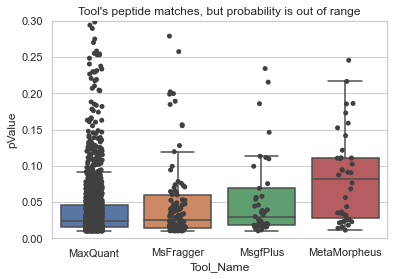

In [35]:
sns.set(style="whitegrid")

ax = sns.boxplot(x="Tool_Name", y="pValue", data=Pvals_over, showfliers = False)
ax = sns.stripplot(x="Tool_Name", y="pValue", data=Pvals_over, color=".25")
plt.ylim(0,0.3)
plt.title("Tool's peptide matches, but probability is out of range")
plt.show()